In [13]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import yfinance as yf
import matplotlib.pyplot as plt

In [198]:
tickers = ["AAPL", "GOOG"]
data = yf.download(tickers, start="2020-01-01")["Adj Close"]
data.head()

[*********************100%***********************]  2 of 2 completed


,AAPL,GOOG
Date,,
2020-01-02,74.333511,1367.369995
2020-01-03,73.610840,1360.660034
2020-01-06,74.197395,1394.209961
2020-01-07,73.848442,1393.339966
2020-01-08,75.036385,1404.319946


In [200]:
rets = data.pct_change().dropna()
mu = rets.mean()
std = rets.std()
corr = rets.corr()

AAPL    0.027346
GOOG    0.023014
dtype: float64

In [201]:
growth_rates = ss.norm(mu[0],std[0]).rvs(n)
growth_rates+1

array([1.03838944, 1.02253886, 0.98170015, 0.97874843, 1.01327178,
       0.9666366 , 1.01823079, 0.99651129, 0.92754507, 1.01926018,
       1.00448315, 1.02258334, 1.01714526, 1.01243146, 1.01983779,
       0.96651221, 0.96458453, 0.98668826, 0.99977062, 1.01833327,
       1.02660367, 0.98330817, 0.99567563, 1.00056262, 0.99127135,
       1.03229891, 1.08026143, 0.97820396, 1.054189  , 0.99776555,
       1.04876415, 1.01632202, 0.99238561, 1.04999184, 0.94402981,
       1.03926874, 1.00409596, 0.99706748, 0.99502884, 0.96502429,
       1.00222119, 0.98107048, 1.00477724, 0.98141923, 0.98495219,
       0.99035874, 0.99502955, 0.98849893, 0.99563099, 1.01735354,
       0.98669831, 1.00265659, 1.03170814, 0.99972931, 1.00913097,
       1.00904722, 1.01923114, 1.04877759, 1.0463217 , 0.99430423,
       1.03918713, 1.02820899, 1.04816519, 1.01937946, 0.99607433,
       1.0052472 , 0.98429991, 1.02451395, 1.00505595, 1.03388023,
       1.01845336, 0.9892813 , 1.00708627, 0.99973196, 0.98456

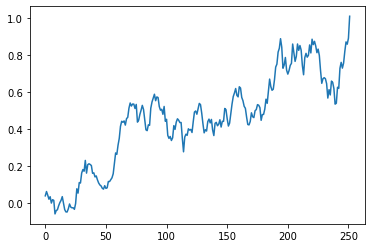

In [202]:
returns = ((1 + growth_rates).cumprod() - 1)
plt.plot(returns)

In [204]:
growth_rates = ss.norm(mu[1],std[1]).rvs(n)

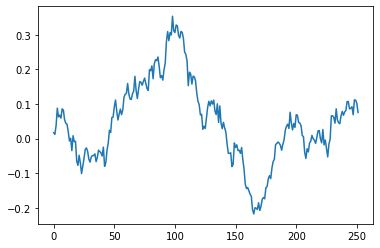

In [205]:
returns = ((1 + growth_rates).cumprod() - 1)
plt.plot(returns)

In [207]:
cov_mat = np.array([[std[0]**2, corr.iloc[0,1]*std[0]*std[1]],
                    [corr.iloc[0,1]*std[0]*std[1], std[1]**2]])
cov_mat

array([[0.00074782, 0.00044908],
       [0.00044908, 0.00052965]])

In [243]:
n = 252
growth_rates = ss.multivariate_normal(
    mean=mu,
    cov=cov_mat).rvs(n)

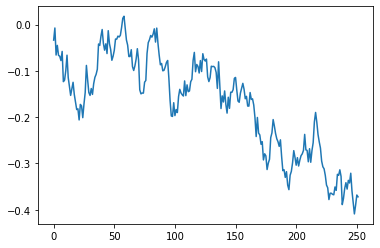

In [244]:
returns = ((1 + growth_rates[:,0]).cumprod() - 1)
plt.plot(returns)

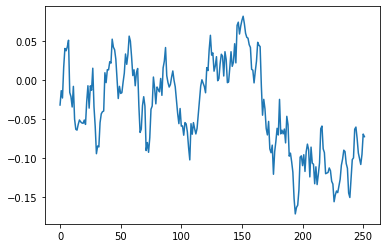

In [245]:
returns = ((1 + growth_rates[:,1]).cumprod() - 1)
plt.plot(returns)

In [246]:
data.iloc[-1].to_list()

[134.1175994873047, 2401.844970703125]

In [247]:
sim_prices = [np.array(data.iloc[-1].to_list())]
for i in range(1, n):
    sim_prices.append(sim_prices[i-1]*(growth_rates[i-1]+1))
    
sim_prices = np.array(sim_prices)

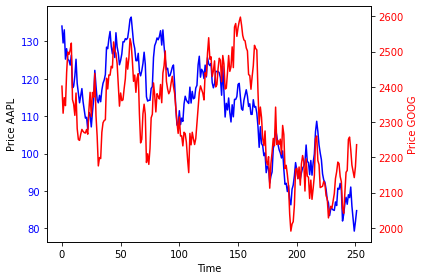

In [248]:
fig, ax1 = plt.subplots()

color = 'blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Price AAPL')
ax1.plot(sim_prices[:,0], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'red'
ax2.set_ylabel("Price GOOG", color=color)
ax2.plot(sim_prices[:,1], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [249]:
np.corrcoef(sim_prices[:,0], sim_prices[:,1])

array([[1.        , 0.77909119],
       [0.77909119, 1.        ]])

In [221]:
corr

,AAPL,GOOG
AAPL,1.000000,0.713559
GOOG,0.713559,1.000000


In [268]:
# tickers = ["AAPL", "GOOG", "LULU"]
tickers = ["RCL", "AAL", "MSFT", "BAC", "SNAP", "AMZN", "KO", "DIS", "COST", "VZ", "AMD", "NVDA", "WMT", "V", "HD", "DPZ", "JBLU", "MDLZ", "TSLA", "WEN", "UPS", "PLUG", "PLTR", "SNE"]
data = yf.download(tickers, start="2015-01-01")["Adj Close"]
rets = data.pct_change().dropna()
mu = rets.mean()
std = rets.std()
corr = rets.corr()
rets.tail()

[*********************100%***********************]  24 of 24 completed


,AAL,AMD,AMZN,BAC,COST,DIS,DPZ,HD,JBLU,KO,...,PLUG,RCL,SNAP,SNE,TSLA,UPS,V,VZ,WEN,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2021-04-22,-0.044741,-0.031246,-0.015758,-0.009298,-0.007565,-0.001911,0.010030,-0.013775,-0.003014,-0.003113,...,-0.023581,-0.006022,-0.021441,0.004611,-0.032831,-0.005936,0.000528,-0.014792,0.012081,-0.010836
2021-04-23,0.051819,0.046800,0.009622,0.021376,0.005441,0.001423,-0.002633,0.007559,0.021662,0.000551,...,0.055849,0.019363,0.074496,0.009179,0.013492,0.008169,0.010678,0.000349,-0.000884,0.001647
2021-04-26,0.044055,0.032020,0.020390,0.005870,-0.012752,0.006830,0.006286,-0.012041,0.014300,-0.014871,...,0.046819,0.013169,-0.020881,-0.009278,0.012065,-0.017602,0.001478,-0.006283,-0.017257,-0.014224
2021-04-27,-0.012704,-0.002342,0.002473,0.011926,0.004586,0.002008,0.002049,0.001875,-0.021876,-0.001491,...,-0.025265,0.007936,0.008164,-0.020657,-0.045326,0.104203,-0.001867,-0.010889,0.003152,0.003408
2021-04-28,-0.004329,-0.011032,0.016704,0.005627,-0.001999,-0.005199,0.014700,-0.000303,-0.005964,-0.000187,...,0.012785,-0.002396,0.006611,0.000000,-0.010657,0.016252,0.017572,0.002488,-0.002244,-0.001807


In [251]:
def build_cov_mat(std, corr):
    n = len(std)
    cov_mat = []
    for i in range(n):
        row = []
        for j in range(n):
            if i == j:
                row.append(std[i]**2)
            else:
                row.append(corr.iloc[i, j]*std[i]*std[j])
        cov_mat.append(row)        
    return np.array(cov_mat)

In [253]:
cov_mat = build_cov_mat(std, corr)
cov_mat[:5,:5]

array([[ 1.32690049e-03,  8.18640306e-06, -6.56128410e-05,
         4.40605379e-04, -8.03242338e-05],
       [ 8.18640306e-06,  6.90374786e-04,  2.60846987e-04,
        -4.22119796e-05,  1.25048856e-04],
       [-6.56128410e-05,  2.60846987e-04,  3.38304824e-04,
        -6.02053482e-05,  1.28414020e-04],
       [ 4.40605379e-04, -4.22119796e-05, -6.02053482e-05,
         4.78485568e-04, -4.77502700e-05],
       [-8.03242338e-05,  1.25048856e-04,  1.28414020e-04,
        -4.77502700e-05,  1.41556238e-04]])

In [262]:
n = 252
growth_rates = ss.multivariate_normal(
    mean=mu,
    cov=cov_mat).rvs(n)

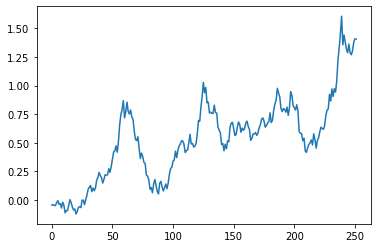

In [263]:
returns = ((1 + growth_rates[:,0]).cumprod() - 1)
plt.plot(returns)

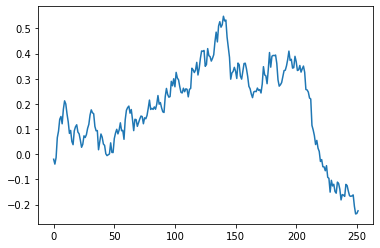

In [264]:
returns = ((1 + growth_rates[:,1]).cumprod() - 1)
plt.plot(returns)

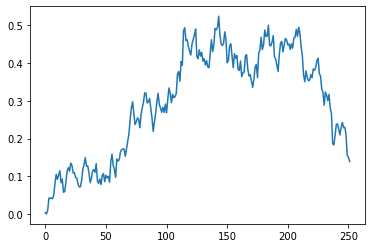

In [265]:
returns = ((1 + growth_rates[:,2]).cumprod() - 1)
plt.plot(returns)

In [266]:
sim_prices = [np.array(data.iloc[-1].to_list())]
for i in range(1, n):
    sim_prices.append(sim_prices[i-1]*(growth_rates[i-1]+1))
    
sim_prices = np.array(sim_prices)
sim_prices[:5]

array([[  21.65500069,   84.20500183, 3475.18994141,   40.07500076,
         369.51998901,  183.77999878,  407.15499878,  320.42999268,
          20.01499939,   53.6072998 ,   60.90999985,  254.97900391,
         613.09002686,   23.82500076,   28.86000061,   87.13500214,
          60.79499817,           nan,  696.66992188,  198.02999878,
         234.03999329,   56.47499847,   22.22500038,  138.16000366],
       [  20.67118343,   82.52701871, 3487.94000597,   39.50536691,
         368.63871402,  180.16132366,  413.70135791,  322.01548957,
          19.88062384,   53.52858167,   60.9940605 ,  256.43689989,
         610.49372711,   21.73256885,   26.88085769,   85.4915675 ,
          64.49948144,           nan,  706.81364204,  201.03562488,
         231.27603459,   56.2149959 ,   22.45497598,  137.27783032],
       [  20.76521579,   80.89780427, 3477.28001812,   38.98299944,
         373.3217106 ,  186.804853  ,  404.10409824,  327.54396973,
          20.1701961 ,   54.10383549,   61.698

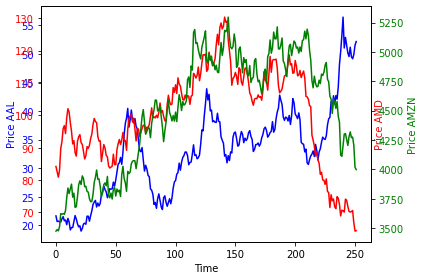

In [269]:
fig, ax1 = plt.subplots()

color = 'blue'
ax1.set_xlabel('Time')
ax1.set_ylabel(f'Price {rets.columns[0]}', color=color)
ax1.plot(sim_prices[:,0], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'red'
ax2.set_ylabel(f'Price {rets.columns[1]}', color=color)
ax2.plot(sim_prices[:,1], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax2.twinx()

color = 'green'
ax3.set_ylabel(f'Price {rets.columns[2]}', color=color)
ax3.plot(sim_prices[:,2], color=color)
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [261]:
corr.loc["RCL", "AAL"]

0.7502588644531902

In [272]:
pd.DataFrame(sim_prices, columns=rets.columns)

,AAL,AMD,AMZN,BAC,COST,DIS,DPZ,HD,JBLU,KO,...,PLUG,RCL,SNAP,SNE,TSLA,UPS,V,VZ,WEN,WMT
0,21.655001,84.205002,3475.189941,40.075001,369.519989,183.779999,407.154999,320.429993,20.014999,53.607300,...,28.860001,87.135002,60.794998,NaN,696.669922,198.029999,234.039993,56.474998,22.225000,138.160004
1,20.671183,82.527019,3487.940006,39.505367,368.638714,180.161324,413.701358,322.015490,19.880624,53.528582,...,26.880858,85.491568,64.499481,NaN,706.813642,201.035625,231.276035,56.214996,22.454976,137.277830
2,20.765216,80.897804,3477.280018,38.982999,373.321711,186.804853,404.104098,327.543970,20.170196,54.103835,...,26.263937,84.298287,67.596039,NaN,680.555496,206.317313,234.447259,56.753975,22.303831,140.528105
3,20.605652,83.092227,3511.730454,40.394990,370.271333,188.031857,393.435187,323.594958,20.848561,54.884131,...,26.904909,88.935525,67.797586,NaN,712.654758,202.495427,239.684209,57.655867,22.632370,142.758899
4,20.603709,89.745936,3623.673511,40.869033,374.741114,187.063521,405.904467,328.406403,20.960477,54.795794,...,28.288687,88.126057,71.984536,NaN,725.234414,208.141787,245.382822,58.065594,22.719039,143.224073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,49.498071,70.261769,4270.255247,86.480420,326.726646,574.554568,270.126289,408.049605,69.604797,72.022811,...,60.102722,96.903313,232.053044,NaN,483.369858,270.637775,243.759566,41.438562,21.248039,111.626144
248,49.130255,70.600633,4275.805137,90.694685,324.824667,580.884985,265.658481,397.953615,70.984340,73.037725,...,60.377267,102.218160,233.217308,NaN,483.482246,272.016238,251.115010,41.881705,20.816996,113.313468
249,49.877264,66.806193,4205.061810,90.358446,322.949824,578.056232,263.002452,392.434491,73.972507,73.079980,...,54.761462,102.161895,227.581225,NaN,463.603533,263.356728,248.476221,42.290313,20.326338,113.259116
250,51.498300,64.232823,4017.717518,93.969177,319.493488,623.193896,258.660715,390.436754,76.537052,74.339732,...,50.179453,110.775747,215.727157,NaN,411.581946,266.797135,250.435947,42.582132,20.254895,114.099193


In [288]:
tickers = ["RCL", "AAL", "MSFT", "BAC", "SNAP", "AMZN", "KO", "DIS", "COST", "VZ", "AMD", "NVDA", "WMT", "V", "HD", "DPZ", "JBLU", "MDLZ", "TSLA", "WEN", "UPS", "PLUG", "PLTR"]
len(tickers)

23

In [302]:
def monte_carlo(trials = 10000, steps=252):
    
    tickers = ["RCL", "AAL", "MSFT", "BAC", "SNAP", "AMZN", "KO", "DIS", "COST", "VZ", "AMD", "NVDA", "WMT", "V", "HD", "DPZ", "JBLU", "MDLZ", "TSLA", "WEN", "UPS", "PLUG", "PLTR"]
    data = yf.download(tickers, start="2015-01-01")["Adj Close"]
    rets = data.pct_change().dropna()
    mu = rets.mean()
    std = rets.std()
    corr = rets.corr()
    
    cov_mat = build_cov_mat(std, corr)
    
    n=len(tickers)
    weights = np.array([1/n]*n)
    
    all_port_returns = []
    
    for k in range(trials):
        
        growth_rates = ss.multivariate_normal(mean=mu,cov=cov_mat).rvs(steps)
        
        sim_prices = [np.array(data.iloc[-1].to_list())]
        for i in range(1, steps):
            sim_prices.append(sim_prices[i-1]*(growth_rates[i-1]+1))

        sim_prices = np.array(sim_prices)
        
        df = pd.DataFrame(sim_prices, columns=rets.columns)
        
        returns = df.pct_change().dropna()
        port_returns = returns.apply(lambda x: weights.T@x, axis=1)
        all_port_returns.append(np.array(port_returns.to_list()))

    return np.array(all_port_returns)
    
port_returns = monte_carlo(100)
    

[*********************100%***********************]  23 of 23 completed


<AxesSubplot:>

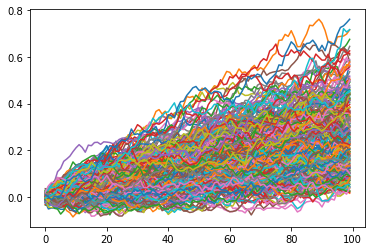

In [307]:
port_returns = pd.DataFrame(port_returns)
((port_returns+1).cumprod() - 1).plot(legend=False)